In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

Text(0, 0.5, 'color_intensity')

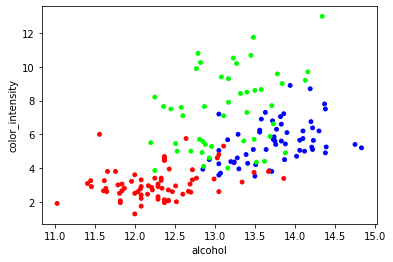

In [2]:
features = [0, 9]

wine = datasets.load_wine()
data = wine.data[:, features]
targets = wine.target

plt.scatter(data[:, 0], data[:, 1], c=targets, s=15, cmap=plt.cm.brg)
plt.xlabel(wine.feature_names[features[0]])
plt.ylabel(wine.feature_names[features[1]])

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

Text(0, 0.5, 'color_intensity')

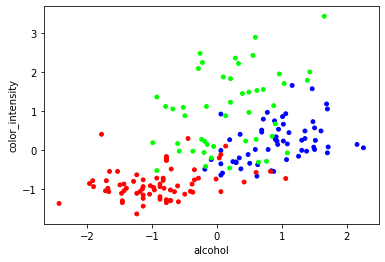

In [5]:
plt.scatter(data[:, 0], data[:, 1], c=targets, s=15, cmap=plt.cm.brg)
plt.xlabel(wine.feature_names[features[0]])
plt.ylabel(wine.feature_names[features[1]])

In [6]:
import torch
from torch import nn

In [7]:
input_size = data.shape[1]
hidden_size = 32
out_size = len(wine.target_names)

In [8]:
net = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, out_size),
    nn.Softmax()
)

In [9]:
def plot_boundary(X, y, model):
    x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    
    spacing = min(x_max - x_min, y_max - y_min)/ 100
    
    XX, YY = np.meshgrid(np.arange(x_min, x_max, spacing),
                        np.arange(y_min, y_max, spacing))
    
    data = np.hstack((XX.ravel().reshape(-1, 1),
                     YY.ravel().reshape(-1, 1)))
    
    # For binary problems
#     db_prob = model(Variable(torch.Tensor(data)).cuda())
#     clf = np.where(db_prob.cpu().data < 0.5, 0.1)
    
    # For multi-class problems
    db_prob = model(torch.Tensor(data))
    clf = np.argmax(db_prob.cpu().data.numpy(), axis=-1)
    
    Z = clf.reshape(XX.shape)
    
    plt.contourf(XX, YY, Z, cmap=plt.cm.brg, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", s=25, cmap=plt.cm.brg)

C:\Users\Usuário\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\modules\container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


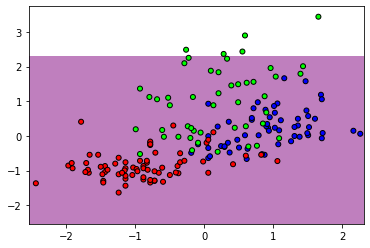

In [10]:
plot_boundary(data, targets, net)

In [11]:
from torch import optim

# Função de perda/ custo
criterion = nn.CrossEntropyLoss()

# Otimizador: descida do gradiente (Stochastic Gradient Descent)
optimizer = optim.SGD(net.parameters(), lr=1e-3)

In [12]:
X = torch.FloatTensor(data)
Y = torch.LongTensor(targets)

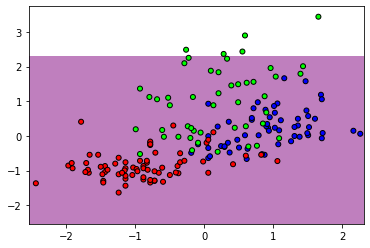

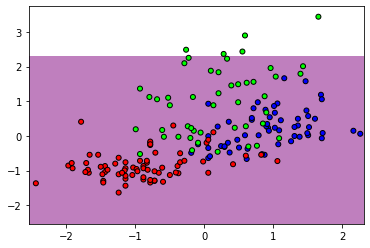

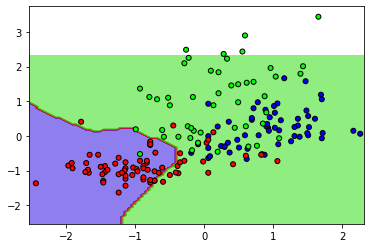

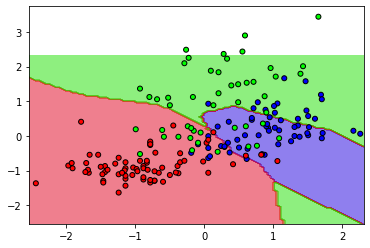

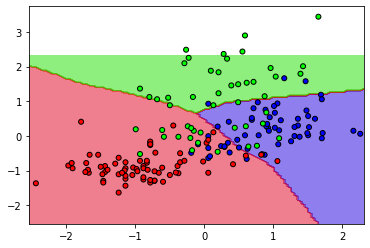

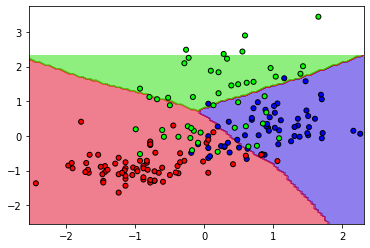

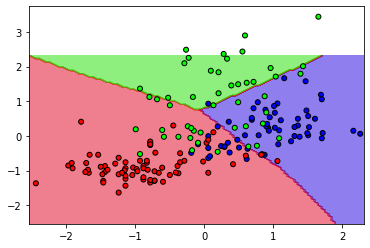

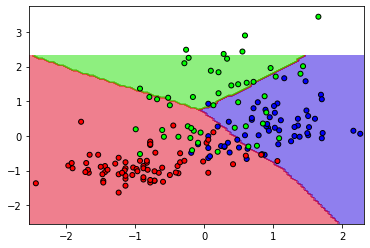

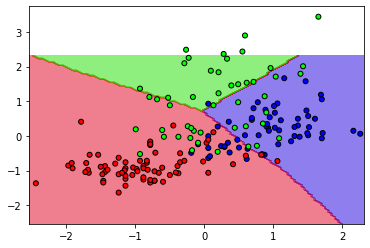

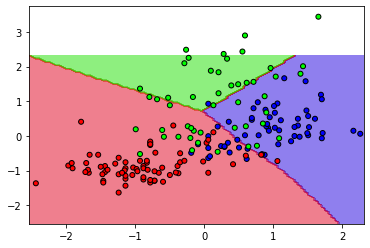

In [13]:
for i in range(100):

    # Forward
    pred = net(X)
    loss = criterion(pred, Y)

    # Backward
    loss.backward()
    optimizer.step()
    
    if i % 10 == 0:
        plt.figure()
        plot_boundary(data, targets, net)

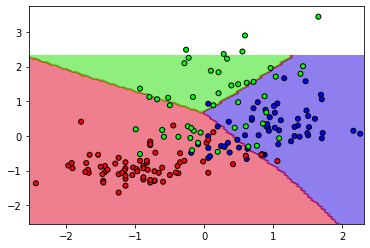

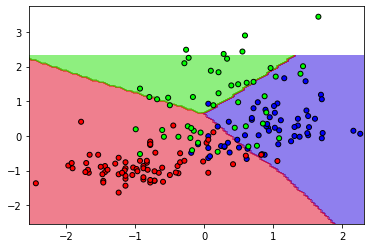

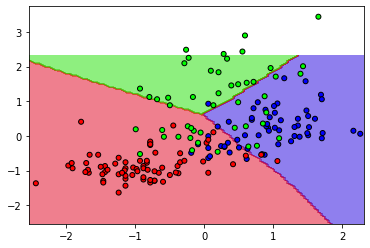

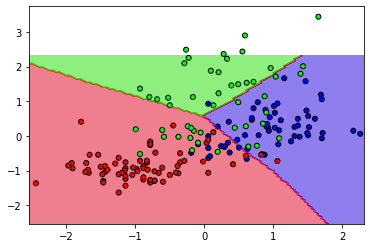

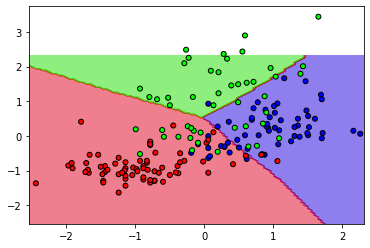

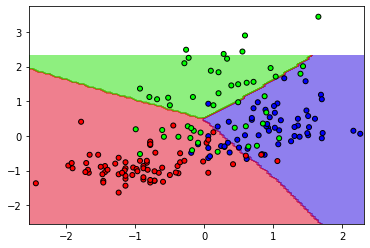

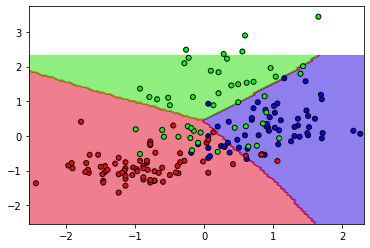

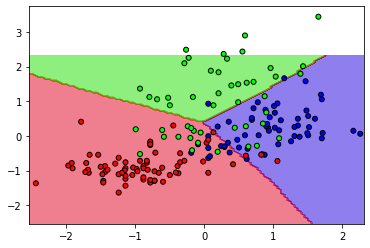

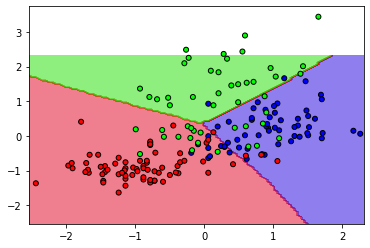

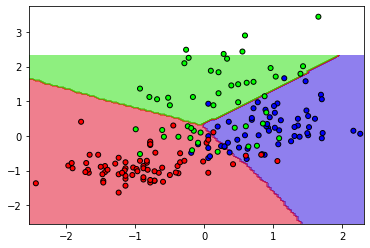

In [14]:
for i in range(100):

    # Forward
    pred = net(X)
    loss = criterion(pred, Y)

    # Backward
    loss.backward()
    optimizer.step()
    
    if i % 10 == 0:
        plt.figure()
        plot_boundary(data, targets, net)